Import Library

In [39]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing dan model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Over-sampling SMOTE
from imblearn.over_sampling import SMOTE

# Konversi model ke ONNX
import tf2onnx

Load Data

In [40]:
# Memuat dataset stroke dari file CSV
df = pd.read_csv('../dataset/stroke_data.csv')

# Menampilkan beberapa baris awal dataset
print("Data awal:")
df.head()

Data awal:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Exploratory Data Analysis (EDA)

In [41]:
# Menampilkan ukuran dataset (jumlah baris dan kolom)
print(f"\nUkuran dataset: {df.shape[0]} baris x {df.shape[1]} kolom")


Ukuran dataset: 5110 baris x 12 kolom


In [42]:
# Informasi tentang tipe data dan nilai non-null
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [43]:
# Memeriksa nilai yang hilang
nilai_null = df.isnull().sum()
print("\nJumlah nilai yang hilang pada setiap kolom:")
print(nilai_null)


Jumlah nilai yang hilang pada setiap kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [44]:
# Distribusi target (stroke/tidak stroke)
print("\nDistribusi kelas target:")
distribusi_stroke = df['stroke'].value_counts()
print(distribusi_stroke)
print(f"Persentase kasus stroke: {distribusi_stroke[1]/len(df)*100:.2f}%")


Distribusi kelas target:
stroke
0    4861
1     249
Name: count, dtype: int64
Persentase kasus stroke: 4.87%


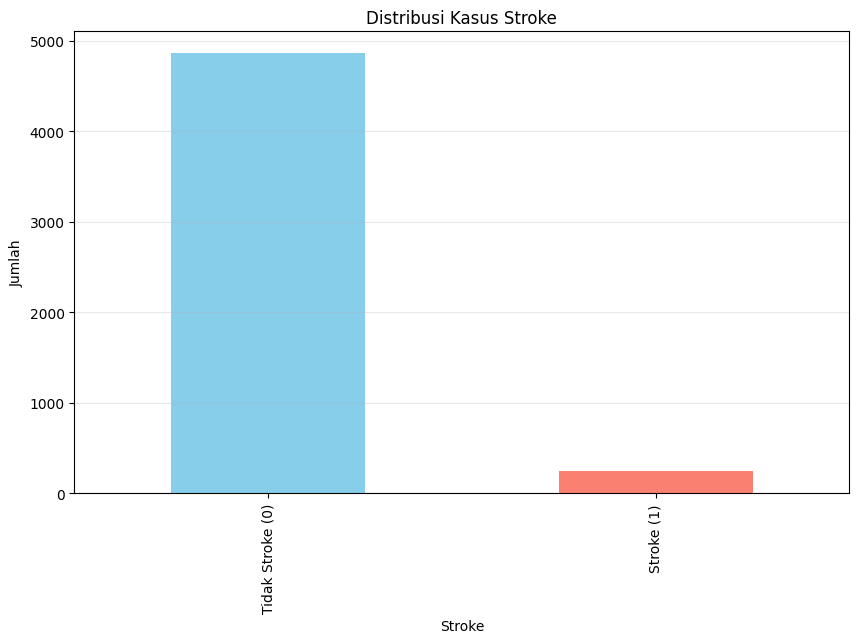

In [45]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10, 6))
distribusi_stroke.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kasus Stroke')
plt.xlabel('Stroke')
plt.ylabel('Jumlah')
plt.xticks([0, 1], ['Tidak Stroke (0)', 'Stroke (1)'])
plt.grid(axis='y', alpha=0.3)
plt.show()

In [46]:
# Analisis statistik deskriptif
print("\nStatistik deskriptif:")
df.describe()


Statistik deskriptif:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


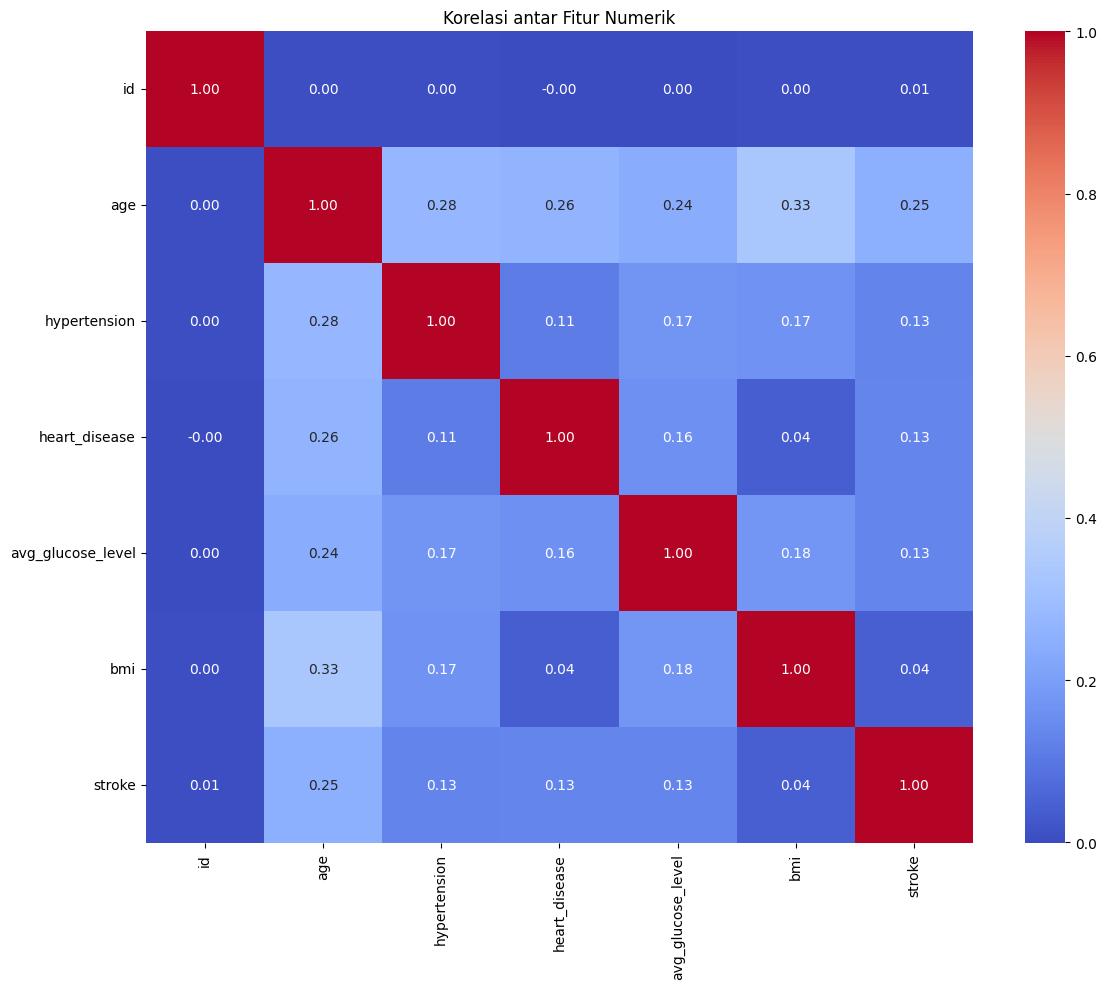

In [47]:
# Visualisasi korelasi antar fitur numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

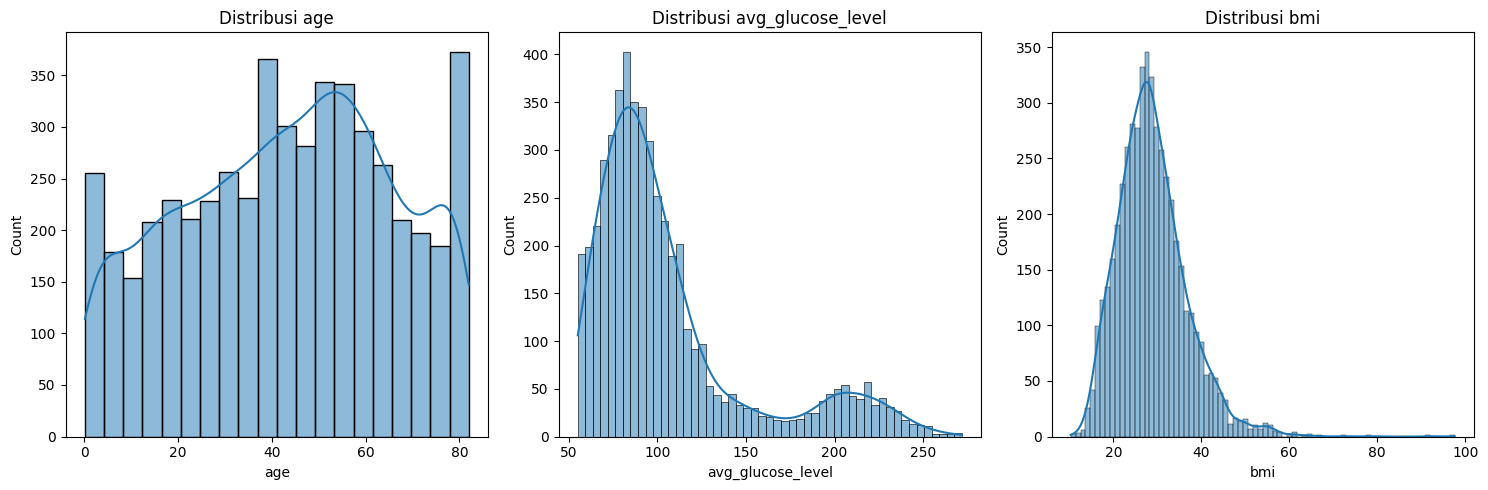

In [48]:
# Distribusi fitur numerik
fitur_numerik = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 5))
for i, kolom in enumerate(fitur_numerik):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[kolom], kde=True)
    plt.title(f'Distribusi {kolom}')
plt.tight_layout()
plt.show()

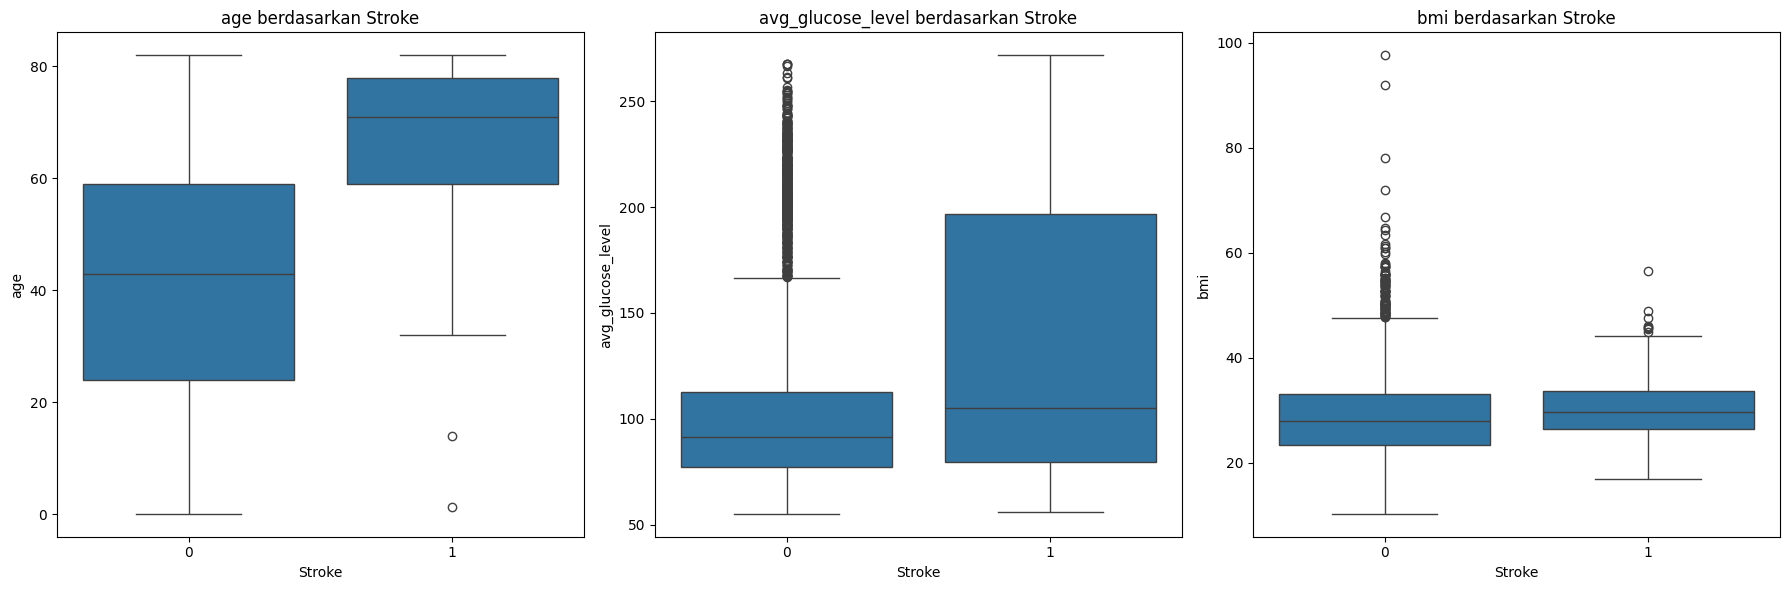

In [49]:
# Distribusi fitur numerik berdasarkan target
plt.figure(figsize=(18, 6))
for i, kolom in enumerate(fitur_numerik):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='stroke', y=kolom, data=df)
    plt.title(f'{kolom} berdasarkan Stroke')
    plt.xlabel('Stroke')
plt.tight_layout()
plt.show()

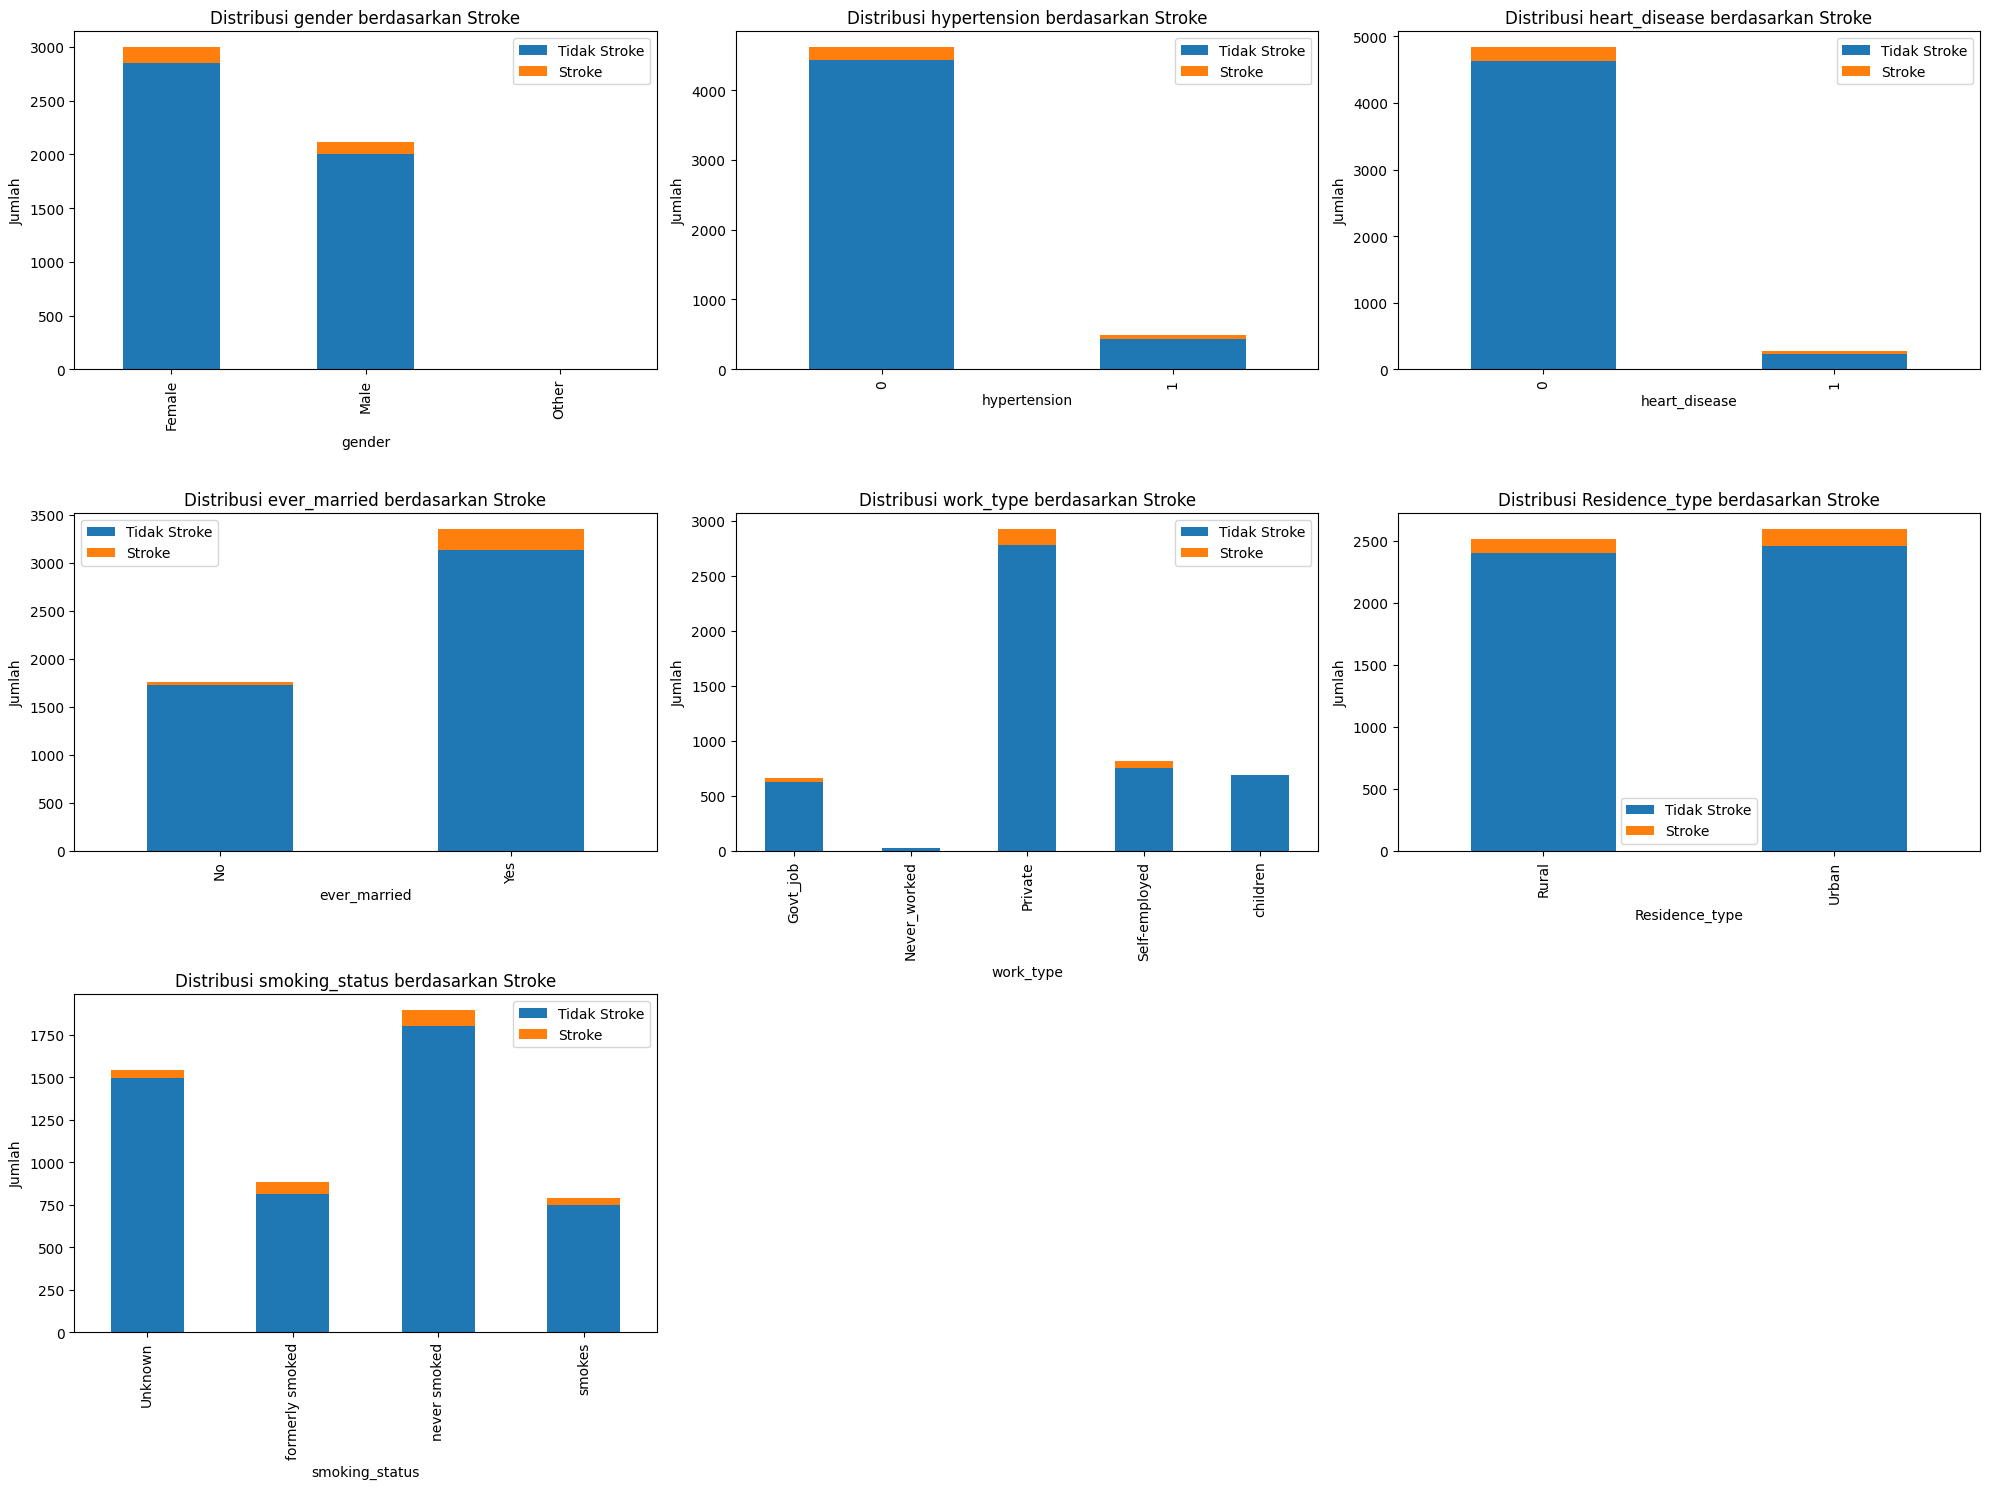

In [50]:
# Analisis fitur kategorikal
fitur_kategorikal = ['gender', 'hypertension', 'heart_disease',
                     'ever_married', 'work_type', 'Residence_type',
                     'smoking_status']

# Visualisasi distribusi fitur kategorikal berdasarkan target
plt.figure(figsize=(20, 15))
for i, kolom in enumerate(fitur_kategorikal):
    ax = plt.subplot(3, 3, i+1)  # Buat axes eksplisit
    pd.crosstab(df[kolom], df['stroke']).plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Distribusi {kolom} berdasarkan Stroke')
    ax.set_xlabel(kolom)
    ax.set_ylabel('Jumlah')
    ax.legend(['Tidak Stroke', 'Stroke'])

plt.tight_layout()
plt.show()

Preprocessing

In [51]:
# Menghapus kolom ID yang tidak relevan
print("\nMenghapus kolom ID...")
df = df.drop('id', axis=1)


Menghapus kolom ID...


In [52]:
# Menangani nilai yang hilang
print("\nMenangani nilai yang hilang...")
print(f"Jumlah nilai BMI yang hilang: {df['bmi'].isnull().sum()}")
print(f"Median BMI: {df['bmi'].median():.2f}")


Menangani nilai yang hilang...
Jumlah nilai BMI yang hilang: 201
Median BMI: 28.10


In [53]:
# Mengisi nilai BMI yang hilang dengan median
df.fillna({'bmi': df['bmi'].median()}, inplace=True)

In [54]:
# Verifikasi tidak ada lagi nilai yang hilang
print("\nNilai yang hilang setelah diisi:")
print(df.isnull().sum())


Nilai yang hilang setelah diisi:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [55]:
# Encoding fitur kategorikal
print("\nEncoding fitur kategorikal...")
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le_dict = {}


Encoding fitur kategorikal...


In [56]:
# Simpan nilai unik untuk setiap kolom kategorikal
for kolom in categorical_cols:
    print(f"{kolom}: {df[kolom].unique()}")
    le = LabelEncoder()
    df[kolom] = le.fit_transform(df[kolom])
    le_dict[kolom] = le
    print(f"Encoding {kolom}: {list(le.classes_)} -> {list(range(len(le.classes_)))}")

gender: ['Male' 'Female' 'Other']
Encoding gender: ['Female', 'Male', 'Other'] -> [0, 1, 2]
ever_married: ['Yes' 'No']
Encoding ever_married: ['No', 'Yes'] -> [0, 1]
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Encoding work_type: ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'] -> [0, 1, 2, 3, 4]
Residence_type: ['Urban' 'Rural']
Encoding Residence_type: ['Rural', 'Urban'] -> [0, 1]
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Encoding smoking_status: ['Unknown', 'formerly smoked', 'never smoked', 'smokes'] -> [0, 1, 2, 3]


In [57]:
#Normalisasi fitur numerik
print("\nMelakukan standarisasi fitur numerik...")
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


Melakukan standarisasi fitur numerik...


In [58]:
print("\nData setelah preprocessing:")
print(df.head())


Data setelah preprocessing:
   gender       age  hypertension  heart_disease  ever_married  work_type  \
0       1  1.051434             0              1             1          2   
1       0  0.786070             0              0             1          3   
2       1  1.626390             0              1             1          2   
3       0  0.255342             0              0             1          2   
4       0  1.582163             1              0             1          3   

   Residence_type  avg_glucose_level       bmi  smoking_status  stroke  
0               1           2.706375  1.005086               1       1  
1               0           2.121559 -0.098981               2       1  
2               0          -0.005028  0.472536               2       1  
3               1           1.437358  0.719327               3       1  
4               0           1.501184 -0.631531               2       1  


In [59]:
# Memisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [60]:
# Membagi data menjadi set pelatihan dan pengujian
# Stratify digunakan untuk mempertahankan proporsi kelas target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f"\nPembagian data: {X_train.shape[0]} data latih, {X_test.shape[0]} data uji")


Pembagian data: 4088 data latih, 1022 data uji


In [61]:
# Menggunakan SMOTE untuk mengatasi ketidakseimbangan kelas
print("\nMenerapkan SMOTE untuk mengatasi ketidakseimbangan kelas...")
print(f"Distribusi kelas sebelum SMOTE: {y_train.value_counts()}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Distribusi kelas setelah SMOTE: {pd.Series(y_train_resampled).value_counts()}")


Menerapkan SMOTE untuk mengatasi ketidakseimbangan kelas...
Distribusi kelas sebelum SMOTE: stroke
0    3889
1     199
Name: count, dtype: int64
Distribusi kelas setelah SMOTE: stroke
0    3889
1    3889
Name: count, dtype: int64


/home/arch/.anaconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [62]:
# One-hot encode target
y_train_categorical = to_categorical(y_train_resampled, num_classes=2)
y_test_categorical = to_categorical(y_test, num_classes=2)

Pemodelan dengan Neural Network

In [63]:
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train_resampled.shape[1]),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])


model.summary()

/home/arch/.anaconda3/envs/main-ds/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330 (1.29 KB)

 Trainable params: 330 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Melatih model
print("\nMelatih model...")
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nMelatih model...")
history = model.fit(
    X_train_resampled,
    y_train_categorical, 
    validation_split=0.2,
    epochs=700,
    batch_size=32,
    callbacks=[early_stop],
    verbose=2
)


Melatih model...

Melatih model...


Epoch 1/700
195/195 - 1s - 5ms/step - accuracy: 0.6798 - loss: 0.6710 - val_accuracy: 0.8149 - val_loss: 0.5552
Epoch 2/700
195/195 - 0s - 1ms/step - accuracy: 0.7617 - loss: 0.6215 - val_accuracy: 0.7224 - val_loss: 0.5507
Epoch 3/700
195/195 - 0s - 1ms/step - accuracy: 0.7698 - loss: 0.5856 - val_accuracy: 0.6915 - val_loss: 0.5556
Epoch 4/700
195/195 - 0s - 1ms/step - accuracy: 0.7726 - loss: 0.5407 - val_accuracy: 0.7269 - val_loss: 0.5157
Epoch 5/700
195/195 - 0s - 1ms/step - accuracy: 0.7769 - loss: 0.4866 - val_accuracy: 0.7301 - val_loss: 0.5156
Epoch 6/700
195/195 - 0s - 1ms/step - accuracy: 0.7787 - loss: 0.4521 - val_accuracy: 0.7410 - val_loss: 0.5285
Epoch 7/700
195/195 - 0s - 1ms/step - accuracy: 0.7805 - loss: 0.4356 - val_accuracy: 0.6922 - val_loss: 0.5897
Epoch 8/700
195/195 - 0s - 1ms/step - accuracy: 0.7835 - loss: 0.4261 - val_accuracy: 0.7288 - val_loss: 0.5511
Epoch 9/700
195/195 - 0s - 1ms/step - accuracy: 0.7880 - loss: 0.4198 - val_accuracy: 0.7416 - val_loss:

Evaluasi Model

In [66]:
# Evaluasi model pada data test
loss, acc = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f"\nAkurasi Uji: {acc:.4f}")
print(f"Loss Uji: {loss:.4f}")


Akurasi Uji: 0.8092
Loss Uji: 0.3789


In [67]:
# Prediksi pada data test
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


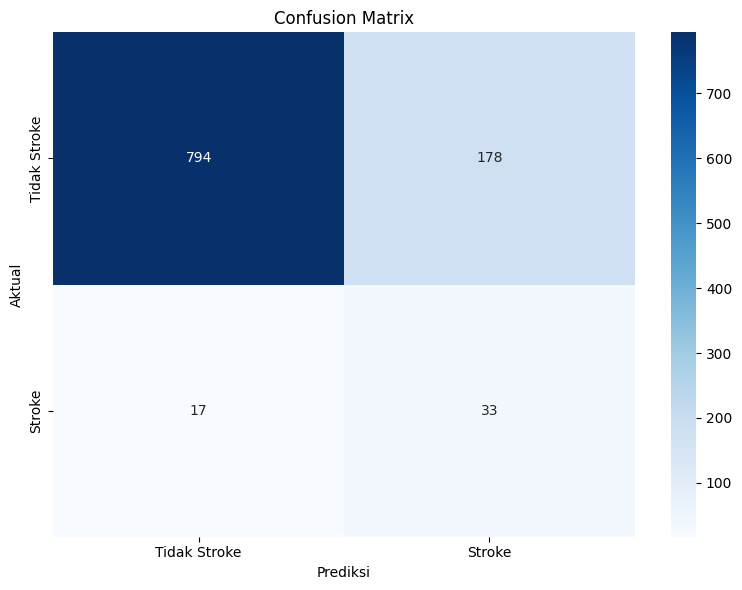

In [68]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Stroke', 'Stroke'], yticklabels=['Tidak Stroke', 'Stroke'])
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

In [69]:
# Classification report
print("\nLaporan klasifikasi:")
print(classification_report(y_test, y_pred, target_names=["Tidak Stroke", "Stroke"]))


Laporan klasifikasi:
              precision    recall  f1-score   support

Tidak Stroke       0.98      0.82      0.89       972
      Stroke       0.16      0.66      0.25        50

    accuracy                           0.81      1022
   macro avg       0.57      0.74      0.57      1022
weighted avg       0.94      0.81      0.86      1022



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step

ROC-AUC Score: 0.8028


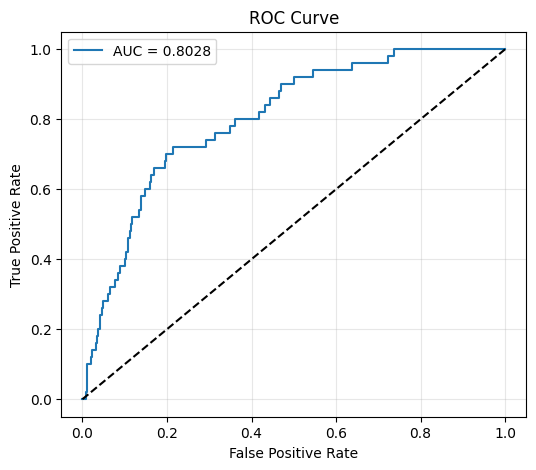

In [70]:
#  Ambil probabilitas untuk kelas 1 (stroke)
y_pred_proba = model.predict(X_test)[:, 1]  # Ambil kolom ke-1 (kelas stroke)

# Ubah y_test_categorical ke bentuk label asli (0 atau 1)
y_test_label = np.argmax(y_test_categorical, axis=1)

# Hitung ROC-AUC Score
auc_score = roc_auc_score(y_test_label, y_pred_proba)
print(f"\nROC-AUC Score: {auc_score:.4f}")

# Hitung nilai fpr dan tpr untuk plot ROC
fpr, tpr, _ = roc_curve(y_test_label, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Inferensi dengan Data Baru

In [71]:
def predict_stroke(age, gender, hypertension, heart_disease, ever_married,
                   work_type, residence_type, avg_glucose_level, bmi, smoking_status):
    new_data = pd.DataFrame([{
        'gender': le_dict['gender'].transform([gender])[0],
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'ever_married': le_dict['ever_married'].transform([ever_married])[0],
        'work_type': le_dict['work_type'].transform([work_type])[0],
        'Residence_type': le_dict['Residence_type'].transform([residence_type])[0],
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
        'smoking_status': le_dict['smoking_status'].transform([smoking_status])[0]
    }])
    
    new_data[numerical_cols] = scaler.transform(new_data[numerical_cols])
    prob = model.predict(new_data)[0][0]
    
    return {
        'predicted_class': int(prob >= 0.5),
        'prob_stroke': prob,
        'prob_tidak_stroke': 1 - prob
    }


In [72]:
result = predict_stroke(
    age=65,
    gender='Male',
    hypertension=1,
    heart_disease=1,
    ever_married='Yes',
    work_type='Private',
    residence_type='Urban',
    avg_glucose_level=200,
    bmi=28,
    smoking_status='formerly smoked'
)

print("\nHasil Prediksi Contoh:")
print(f"Prediksi: {'Stroke' if result['predicted_class'] == 1 else 'Tidak Stroke'}")
print(f"Probabilitas Stroke: {result['prob_stroke']:.4f}")
print(f"Probabilitas Tidak Stroke: {result['prob_tidak_stroke']:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Hasil Prediksi Contoh:
Prediksi: Stroke
Probabilitas Stroke: 0.9608
Probabilitas Tidak Stroke: 0.0392


Simpan Model

In [73]:
# Simpan model dalam format TensorFlow SavedModel
model_dir = "saved_model_stroke"
tf.saved_model.save(model, model_dir)
print(f"Model TensorFlow telah disimpan di: {model_dir}")

INFO:tensorflow:Assets written to: saved_model_stroke/assets


INFO:tensorflow:Assets written to: saved_model_stroke/assets


Model TensorFlow telah disimpan di: saved_model_stroke


In [74]:
# Konversi model ke format ONNX
!python -m tf2onnx.convert --saved-model {model_dir} --output model_stroke.onnx
print("\nProses selesai!")

E0000 00:00:1747574649.844414   20891 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747574649.847738   20891 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747574649.857297   20891 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574649.857329   20891 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574649.857331   20891 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747574649.857333   20891 computation_placer.cc:177] computation placer already registered. Please check linka